In [1]:
# Install igraph
!pip install python-igraph

In [2]:
import igraph as ig

In [3]:
%run -i _functions.ipynb

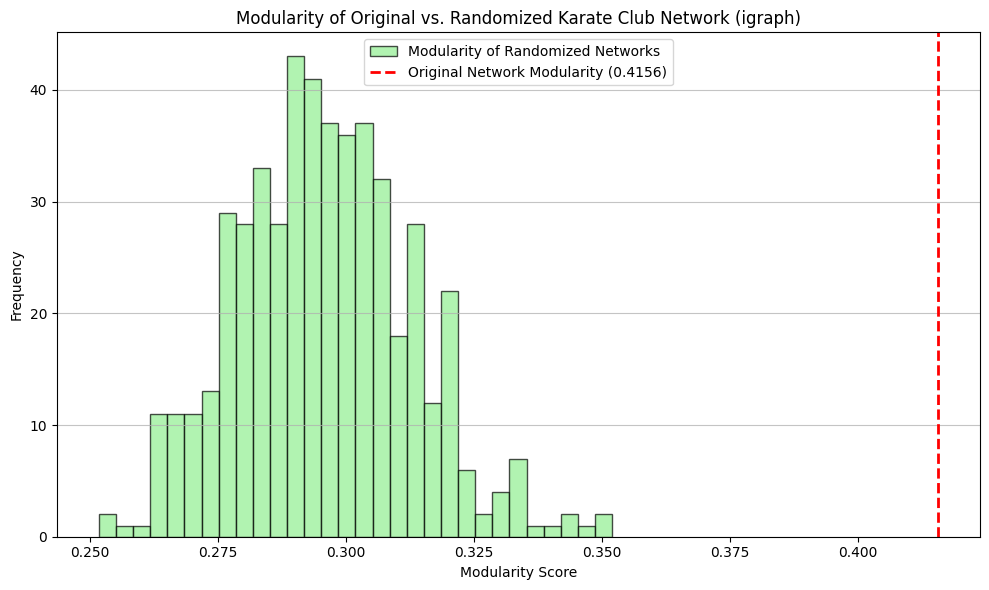

In [4]:
karate_club = ig.Graph.Famous("Zachary")

karate_club_modularity_orig = get_modularity_on_clustering(karate_club)

test_community_structure(karate_club, graph_name="Karate Club Network")

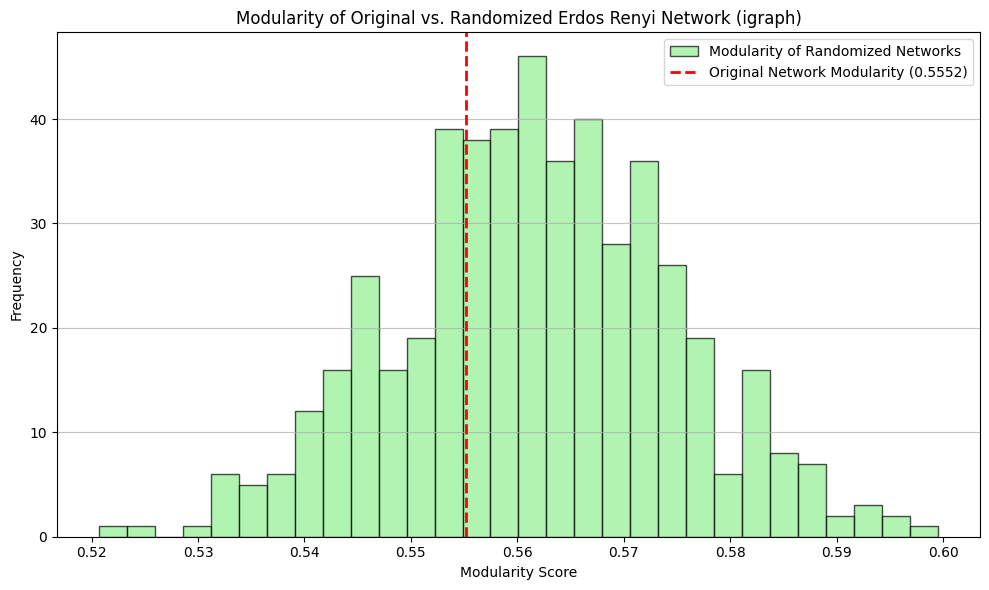

In [5]:
num_nodes = 100
num_edges = 150

er_graph = ig.Graph.Erdos_Renyi(n=num_nodes, m=num_edges, directed=False, loops=False)

er_modularity_orig = get_modularity_on_clustering(karate_club)

test_community_structure(er_graph, graph_name="Erdos Renyi Network")